
# Kinematics of a 2-link plane manipulator with Python

# Based on the Denavit-Hartenberg (DH) Convention

Requirements


Sympy (for symbolic computation)
Numpy (for numerical computaion)

Install the following libraries using conda or phyton:

Install matplotlib (pip install matplotlib)

Install sympy https://pypi.org/project/sympy/




With SymPy, we initialize printing so that all mathematical expressions can be represented in standard mathematical notation.

In [32]:
# Required libraries
import numpy as np # library for numerical calculation
import sympy as sp

In [33]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

# 2-axis flat manipulator / Planar Robot

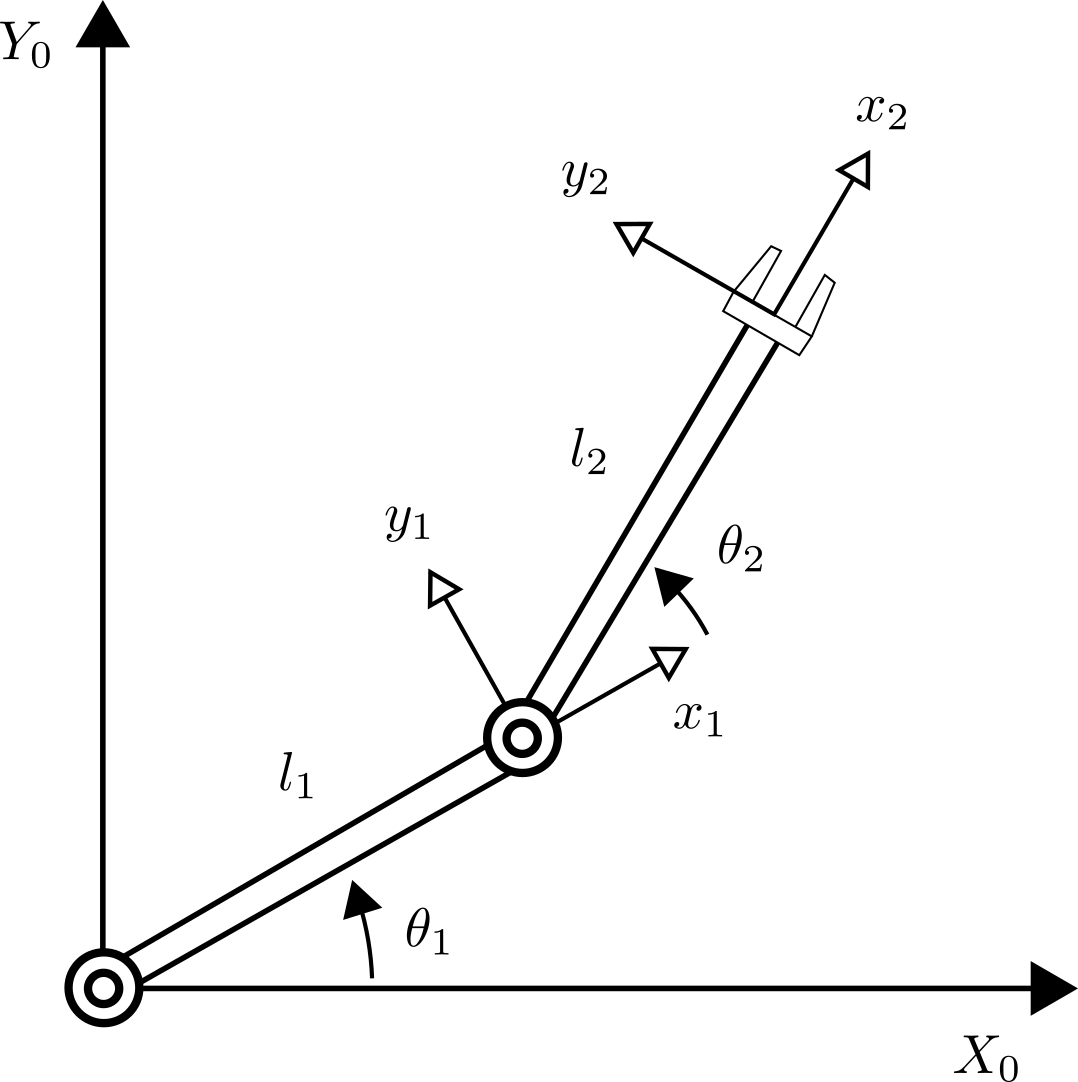

In [39]:
from IPython.display import Image
Image('2rp_new.png', width=300)

In [40]:
# we declare the symbols (lengths, variables, etc.) that will be used for a later formulation.

from sympy.physics.mechanics import dynamicsymbols
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d 

(theta1, theta2, l1, l2, theta, alpha, a, d)

In [41]:
# The standard homogeneous transformation matrix is represented as:

rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)

m


Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

# Now we have to apply the values of the DH Table in the matrices

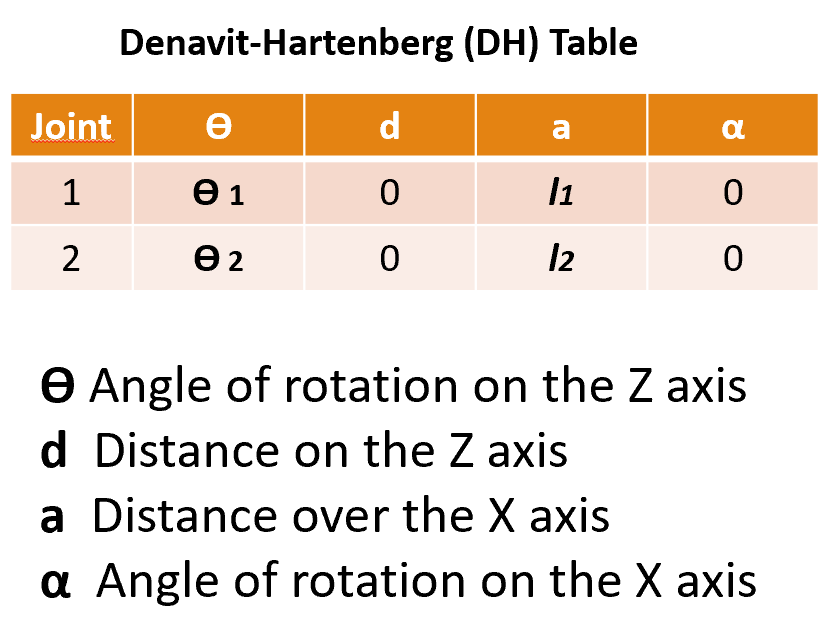

In [42]:
from IPython.display import Image
Image('DHTable.png', width=300)

In [43]:
# Transformation: 1st axis from '0' to '1'
m01 = m.subs({alpha:0, a:l1, theta:theta1, d:0})
m01


Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [44]:
# Transformation: 1st axis from '1' a '2'
m12 = m.subs({alpha:0, a:l2, theta:theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [45]:
# Final translation matrix of planar robot

m02 = (m01*m12)
m02

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0, l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1)],
[                                                 0,                                                  0, 1,                                                                        0],
[                                                 0,                                                  0, 0,                                                                        1]])

In [46]:
# Using Sympy's built-in simplification methods, we simplify the transformation matrix as

mbee= sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), 0 , sp.trigsimp(m02[0,3].simplify())],
                 [m02[1,0].simplify(), m02[1,1].simplify(), 0 , sp.trigsimp(m02[1,3].simplify())],
                 [m02[2,0].simplify(), m02[2,1].simplify(), 1 ,                0                ],
                 [        0          ,           0        , 0 ,                1                ]])

mbee

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0, l1*cos(theta1) + l2*cos(theta1 + theta2)],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0, l1*sin(theta1) + l2*sin(theta1 + theta2)],
[                   0,                     0, 1,                                        0],
[                   0,                     0, 0,                                        1]])

Annotation:
The first three columns of the matrix above describe the orientation of the manipulator tip in the X, Y, and Z directions.
The last column represents the position in the respective addresses.


Kinematic equations where the position of the tip can be expressed as:

In [47]:
px = mbee[0,3]
print('x:')
px

x:


l1*cos(theta1) + l2*cos(theta1 + theta2)

In [48]:
py = mbee[1,3]
print('y:')
py

y:


l1*sin(theta1) + l2*sin(theta1 + theta2)

# Exercise:
## Take out the resulting matrix of the three-axis Planar Robot. Identify the final X,Y position.

Follow the same process that we have carried out with the 2-axis planar robot


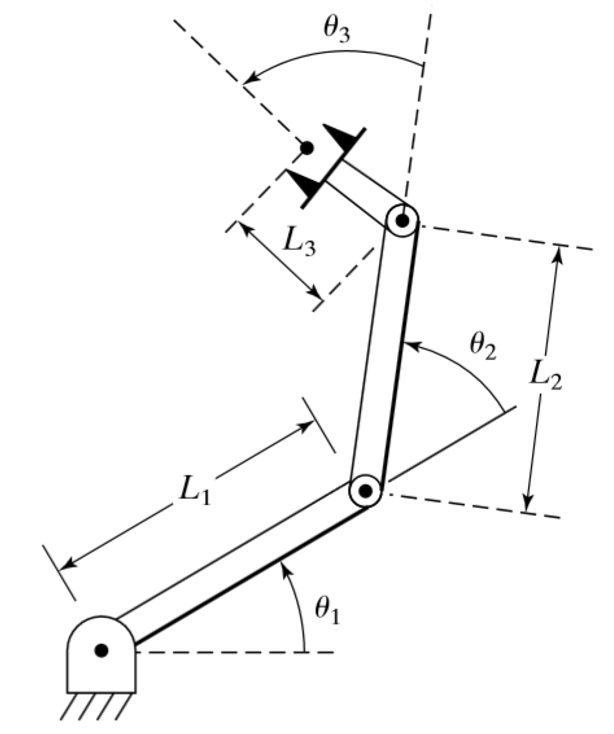

In [49]:
from IPython.display import Image
Image('3rp_new.png', width=300)

The DH table in the three-axis planar is as follows:

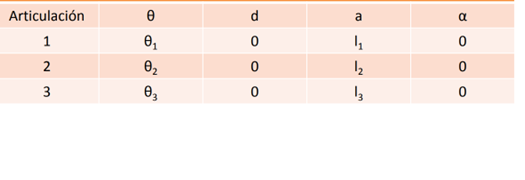

In [50]:
from IPython.display import Image
Image('3DHTable.png', width=300)

In [51]:
# we add a third link with theta3 and l3
# also changed from dynamic to regular symbols those that won't change over time.

from sympy import symbols
from sympy.physics.mechanics import dynamicsymbols
theta1, theta2, theta3 = dynamicsymbols('theta1 theta2 theta3')
l1, l2, l3, theta, alpha, a, d = symbols('l1 l2 l3 theta alpha a d')

In [52]:
# The standard homogeneous transformation matrix is represented as:
import sympy as sp
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)

m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

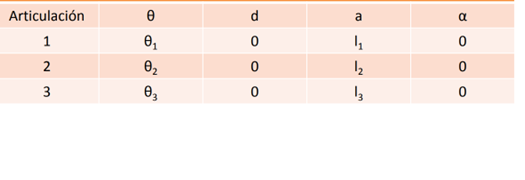

In [53]:
from IPython.display import Image
Image('3DHTable.png', width=300)

In [54]:
# Transformation: 1st axis from '0' to '1'
m01 = m.subs({alpha:0, a:l1, theta:theta1, d:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [55]:
# Transformation: 1st axis from '1' to '2'
m12 = m.subs({alpha:0, a:l2, theta:theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [56]:
# Transformation: 1st axis from '2' to '3'
m23 = m.subs({alpha:0, a:l3, theta:theta3, d:0})
m23

Matrix([
[cos(theta3), -sin(theta3), 0, l3*cos(theta3)],
[sin(theta3),  cos(theta3), 0, l3*sin(theta3)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [57]:
# Translation matrix from '0' to '2'

m02 = (m01*m12)
m02

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0, l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1)],
[                                                 0,                                                  0, 1,                                                                        0],
[                                                 0,                                                  0, 0,                                                                        1]])

In [58]:
# FINAL: Translation matrix from '0' to '3'

m03 = (m02*m23)
m03


Matrix([
[(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + (-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3), -(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*cos(theta3), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2) + l3*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) + l3*(-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1))*sin(theta3)],
[ (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + (sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1))*cos(theta3),   (-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*cos(theta3) - (sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1))*sin(theta3), 0,  l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1) + l3*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*sin(theta3) + l3*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1))*cos(theta3)],
[                  

In [59]:
# Using Sympy's built-in simplification methods, we simplify the transformation
mbee3 = sp.Matrix([
    [m03[0,0].simplify(), m03[0,1].simplify(), 0, sp.trigsimp(m03[0,3].simplify())],
    [m03[1,0].simplify(), m03[1,1].simplify(), 0, sp.trigsimp(m03[1,3].simplify())],
    [m03[2,0].simplify(), m03[2,1].simplify(), 1,                      0          ],
    [         0         ,          0         , 0,                      1          ]
])

mbee3

Matrix([
[cos(theta1 + theta2 + theta3), -sin(theta1 + theta2 + theta3), 0, l1*cos(theta1) + l2*cos(theta1 + theta2) + l3*cos(theta1 + theta2 + theta3)],
[sin(theta1 + theta2 + theta3),  cos(theta1 + theta2 + theta3), 0, l1*sin(theta1) + l2*sin(theta1 + theta2) + l3*sin(theta1 + theta2 + theta3)],
[                            0,                              0, 1,                                                                           0],
[                            0,                              0, 0,                                                                           1]])

t.